# Progetto di Analisys of Algrithms and Data Structures - a.a 2022/2023

Autori: 

- *Magrini Roberto* roberto.magrini@stud.unifi.it

- *Serena Vannacci* 7030223 serena.vannacci@stud.unifi.it

## Obiettivo 

L'obiettivo di questo progetto è l'analisi degli Skew Dyck Paths, attraverso la verifica di alcuni risultati che li riguardano, sulla base dell'articolo: "Skew Dyck Paths Having no Peaks at Level 1" di Helmut Prodinger (Stellenbosch University, Department of Mathematical Sciences, South Africa) e NITheCS.

## Introduzione

Nell'articolo scelto si approfondisce una classe particolare di percorsi combinatori, conosciuti come percorsi di Skew Dyck, che rappresentano una variante dei percorsi di Dyck standard. Tali percorsi possono essere visualizzati come una serie di spostamenti in un piano cartesiano, dove (1, 1) indica uno spostamento verso l'alto e verso destra, (1, -1) uno spostamento verso l'alto e verso sinistra e (-1, -1) uno spostamento verso il basso e verso sinistra, ovvero il passo che li differenzia dai percorsi di Dyck standard. Un'ulteriore caratteristica dei percorsi di Skew Dyck è che essi non devono intersecarsi con se stessi, ciò significa che il percorso non può attraversare o sovrapporsi alle sue stesse tracce.

Rimpiazzando il passo caratteristico dei percorsi di Skew Dyck col passo (1, -1), colorato di rosso, otterremo un Decoreted Dyck Path. Nel paper verranno studiati scenari legati a questa tipologia di percorsi decorati, i quali però non presentano picchi al livello 1.


# Kernel Method

In questa parte vengono ricavate le funzioni generatrici per i vari cammini che terminano in un certo livello.
Utilizzando l'esempio riportato sul paper avremo tre layers (strati) di stati, che variano da zero ad infinito, questi layers sono chiamati 

$$f_{j},  g_{j},  h_{j}$$

uno Skew Dyck Path che termina al livello *j* si calcola con 

$$s_{j} = f_{j} + g_{j} + h_{j}$$

Dal diagramma rappresenato nel paper si ricavano le seguenti ricorsioni: 

$$f_{0} = 0, \; f_{i+1} = zf_{i} + zg_{i}, \; con \: i \ge 0$$
$$g_{0}  = zg_{1} + zh_{1}, \; g_{i} = zf_{i+1} + zg_{i+1} + zh_{i+1}, \; con \: i \ge 1$$
$$h_{i} = zg_{i+1} + zh_{i+1}, \; con \: i \ge 0$$

Da queste equazioni possiamo ricavare le funzioni generatrici bivariate:

$$F(z,u) = \sum_{i\ge0}f_{i}(z)u^{i}, \; G(z,u) = \sum_{i\ge0}g_{i}(z)u^{i}, \; H(z,u) = \sum_{i\ge0}h_{i}(z)u^{i}$$

Ora sostituendo le funzioni generatrici bivariate all ricorsioni trovate in precedenza e riscrivendole in maniera appropriata, otteniamo che:

$$\frac{1}{u}(F(u) - 1) = zF(u) + zG(u)$$
$$G(u) = \frac{z}{u}(F(u) - f_{0} - uf_{1}) + \frac{z}{u}(G(u) - g_{0}) + \frac{z}{u}(H(u) - h_{0})$$
$$H(u) = \frac{z}{u}(G(u) - g_{0}) + \frac{z}{u}(H(u) - h_{0})$$

Se ora risolviamo queste equazioni utilizzando G(u) come variabile, otteniamo le premesse del primo teorema, ovvero che

$$F = \frac{1 + zuG}{1 - zu}$$

$$H = \frac{z(G - 2g_{0})}{u - z}$$

$$G = \frac{-z^{3}(u - z + r_{2}) - z^{2}(-z^{2} +zu +1 +zr_{2})g_{0}}{z(u - r_{1})}$$

con

$$r_{1} = \frac{1 + z^{2} + \sqrt{1 - 6z^{2} + 5z^{4}}}{2z}$$

$$r_{2} = \frac{1 + z^{2} - \sqrt{1 - 6z^{2} + 5z^{4}}}{2z}$$

$$g_{0} = \frac{1 - 2z^{4} - 3z^{2} - \sqrt{1 - 6z^{2} + 5z^{4}}}{2(z^{2} + 3)z^{2}}$$


Innanzitutto importiamo alcuni pacchetti che ci saranno utili per il resto del paper:

In [1]:
from sympy import *
from sympy.abc import *
init_printing()

Definiamo i simboli e le funzioni generatrici che utilizzeremo per eseguire le verifiche di alcuni passaggi illustrati nell'articolo:

In [2]:
z = Symbol("z")
u = Symbol("u")
F = Function('F')(z,u)
G = Function('G')(z,u)
H = Function('H')(z,u)
f0,f1,g0,h0,s0 = symbols("f0,f1,g0,h0,s0")
r1,r2,eq_r1,eq_r2 = symbols("r1,r2,eq_r1,eq_r2")

Come primo passo specifichiamo le condizioni iniziali descritte nell'articolo: 
$$f_{0} = 1$$
$$f_{1} = z + zg_{0}$$
$$g_{0} = h_{0}$$

In [3]:
f0 = 1
f1 = z + z*g0
h0 = g0

Invece di lavorare con 3 funzioni, possiamo ridurre il sistema ad un'unica equazione (con la variabile G).

Dall' equazione 

$$\frac{1}{u}(F(u)-1) = zF(u) + zG(u)$$

dovremmo ricavare:

$$ F = \frac{1 + uzG)}{1 - uz}$$

Osservando che il $-1$ del denominatore viene raccolto e moltiplicato all'intera frazione, otteniamo il risultato aspettato:

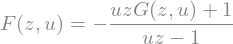

In [4]:
Eq_F = (z*F + z*G) - (1/u)*(F - 1)
Temp_F = solve(Eq_F, F)
Eq(F, collect(Temp_F[0], -1))

Dall' equazione 

$$H(u) = \frac{z}{u}(G(u) - g_0) + \frac{z}{u}(H(u) - h_0)$$

dovremmo ricavare:

$$H = \frac{z(G-g_0-h_0)}{u-z}$$

Ricordando che 

$$h_0 = g_0$$ 

otteniamo il risultato aspettato:

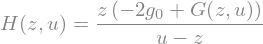

In [5]:
Eq_H = ((z/u)*(G - g0))+((z/u)*(H - h0)) - H
Temp_H = solve(Eq_H, H)
Eq(H,Temp_H[0])

Dall'equazione 

$$G(u) = \frac{z}{u}(F(u) - f_0 - uf_1) + \frac{z}{u}(G(u) - g_0) + \frac{z}{u}(H(u) - h_0)$$

dovremmo ricavare:

$$G = \frac{-z^{3}u(u-z)+z(1-zu)(2+zu-z^{2})g_0}{z(u-r_1)(u-r_2)}$$

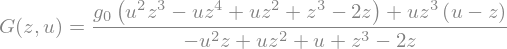

In [6]:
Eq_G = ( ((z/u)*(F - f0 - u*f1)) + ((z/u)*(G - g0)) + ((z/u)*(H - h0)) ) - G
Eq_G_subs = Eq_G.subs({H: Temp_H[0], F: Temp_F[0]})
Temp_G = solve(Eq_G_subs, G)
Eq(G,collect(cancel(Temp_G[0]), [g0, (u*z**3)])) 


Per ricavare $r_1$ e $r_2$ risolviamo il denominatore rispetto alla variabile *u* :


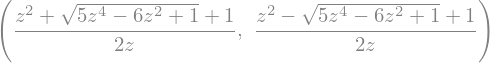

In [7]:
Num, Dem = fraction(collect(cancel(Temp_G[0]), [g0, u*z**3]))
Temp_Dem = solve(Dem, u)
eq_r1 = Temp_Dem[1]
eq_r2 = Temp_Dem[0]
eq_r1, eq_r2

Otteniamo $G(u)$ nella forma:

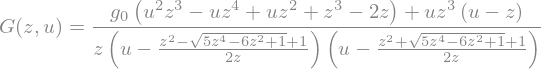

In [8]:
EqG = Num / (z*(u-eq_r1)*(u-eq_r2))
Eq(G,EqG)

Appunto degli autori: I seguenti passaggi dovrebbero essere descritti in modo più chiaro all'interno dell'articolo

Si nota che 

$$ r1r2 = 2 − z^{2}$$


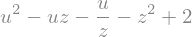

In [9]:
((u-eq_r1)*(u-eq_r2)).expand()

Per una maggiore evidenza della correttezza di tale risultato:

In [10]:
cancel(eq_r1*eq_r2)

Poiché il fattore 

$$u − r2$$

nel denominatore è "sbagliato", deve anche annullarsi nel numeratore. Ciò porta alla nuova versione:

$$G = \frac{-z^{3}(u − z + r_2) − z^{2}(−z^{2} + zu + 1 + zr_2)g_0}{z(u − r_1)}$$


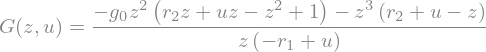

In [11]:
Eq_G_final =  ((-z**3)*(u-z+r2) - z**2*(-z**2 +z*u +1 +z*r2)*g0 ) / (z*(u-r1))
Eq(G, Eq_G_final)


Dobbiamo ora trovare il valore di $g_0$, notiamo, ora, che ponendo $u = 0$ si ha $G(z,0) = g_{0}$. 


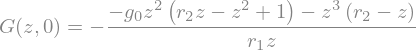

In [12]:
Eq_G0 = collect(Eq_G_final.subs(u,0),[g0])
Eq( G.subs(u,0) , Eq_G0 )


Quindi risolvendo l'equazione per  $g_0$ si ottiene:


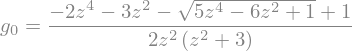

In [13]:
eq_g0 = (1 - 2*(z**4) - 3*(z**2) - sqrt(1 - 6*(z**2) + 5*(z**4)))/(2*(z**2)*((z**2) + 3))
Eq( g0 , collect ( cancel(eq_g0) , [2*z**2] ))

## Teorema 1

Le tre funzioni generatrici bivariate che descrivono i percorsi decorati che terminano nei tre rispettivi strati sono date da:

$$G = \frac{-z^{3}(u − z + r_2) − z^{2}(−z^{2} + zu + 1 + zr_2)g_0}{z(u − r_1)}$$

$$ H(u) = \frac{z(−2g_0+ G(u))}{u-z}$$

$$ F(u) = \frac{1 + zuG(u))}{1 - zu}$$

Poniamo $u=0$, considerando i percorsi che terminano sull'asse x:

$F(z,0)$ corrisponde effettivamente a $f_0 = 1$

In [14]:
F0 = Temp_F[0].subs(u, 0)
F0

$H(z,0)$ corrisponde a $h_0 = g_0$

In [15]:
H0 = (Temp_H[0].subs(G, g0)).subs(u, 0)
H0

Abbiamo verificato ai passi precedenti che $G(z,0) = g_0$

Risolviamo la seguente equazione:

$$ s_0 = f_0 + g_0 + h_0 = F(z,0) + H(z,0) + G(z,0) $$


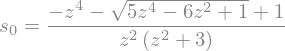

In [16]:
Eq_s0 = simplify((F0 + H0 + g0).subs(g0, eq_g0))
Eq(s0, Eq_s0)

## La congettura

Poiché gli skew paths devono avere un numero di passi pari poniamo $z^2 = x$

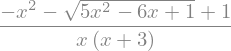

In [17]:
y = Function('y')(x)
y = simplify(Eq_s0.subs(z**2,x))
y

Tale funzione generatrice genera la sequenza del numero di cammini di Dyck inclinati di semilunghezza $n$ senza picchi al livello 1

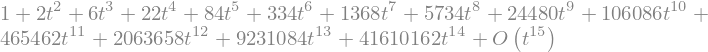

In [18]:
serie_y = y.subs(x,t)
series(serie_y,t,0,15)

I valori ottenuti corrispondono a quelli mostrati nell'articolo. 

## Partial paths 

Si verifica la seguente equazione:

$$S(z, u) = F(z, u) + G(z, u) + H(z, u) = \frac{−z^4 − z^4g_0 − z^2g_0 + z^2 − 1}{z(u − r_1)}$$


Per tale scopo si realizzano le seguenti sostituzioni:

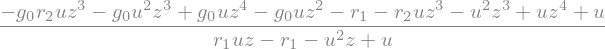

In [19]:
partial_F = cancel(Temp_F[0].subs(G,Eq_G_final))
partial_F

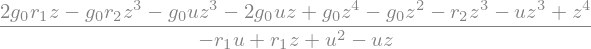

In [20]:
partial_H = cancel(Temp_H[0].subs(G,Eq_G_final))
partial_H

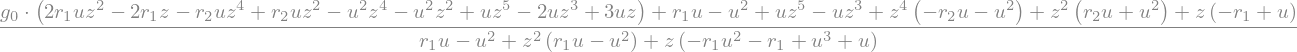

In [21]:
S = Function('S')(u)
S = collect( cancel( partial_H + partial_F + Eq_G_final ), [g0, z, u])
S

## Open-Ended Paths

Possiamo inoltre considerare un qualsiasi livello come livello finale del percorso. In termini di funzioni generatrici, ciò significa considerare $S(z, 1)$:

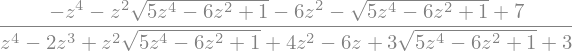

In [22]:
S = S.subs([(u, 1),(g0, eq_g0),(r1, eq_r1),(r2, eq_r2)])
S = simplify(S)
S

La sequenza di coefficienti associata è:

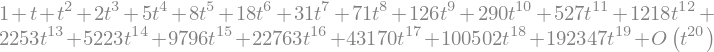

In [23]:
Serie_S = S.subs(z,t)
series(Serie_S,t,0,20) 

La funzione ricavata $S(z,1)$ si presenta in modo differente da quella riportata sull'articolo, ma poiché i risultati sono i medesimi e le operazioni svolte le stesse, possiamo concluderne la correttezza.

## Leggendo i percorsi decorati da destra a sinistra

Utilizzando le ricorsioni successivamente elencate:

$$a_{i+1} = za_{i} + zb_{i} + zc_{i}, \; con \; i\ge0, \; inoltre \; a_{0} = 1$$

$$b_{i} = za_{i+1} + zb_{i+1}, \; con \; i\ge1, \; inoltre \; b_{0} = zb_{1}$$

$$c_{i+1} = za_{i} + zc_{i}, \; con \; i\ge0$$

E le seguenti funzioni generatrici:

$$A(z,u) = \sum_{i\ge0}a_{i}(z)u^{i}\,, \; B(z,u) = \sum_{i\ge0}b_{i}(z)u^{i}\,, \; C(z,u) = \sum_{i\ge0}c_{i}(z)u^{i}$$

Si ottengono le relazioni:

$$A(z,u) = 1 + uzA(z,u) + uzB(z,u) + uzC(z,u)$$

$$B(z,u) = \frac{z}{u}(A(z,u) - a_{0} - ua_{1}) + \frac{z}{u}(B(z,u) - b_{0})$$

$$C(z,u) - c_{0} = uzA(z,u) + uzC(z,u)$$

$$con \; c_{0} = 0, \; a_{0} = 1, \; a_{1} = z + zb_{0}$$

Definiamo le funzioni e i simboli che andremo ad utilizzare:

In [24]:
B = Function('B')(z,u)
A = Function('A')(z,u)
C = Function('C')(z,u)
c0,a0,a1,b0, r1_B, r2_B = symbols("c0,a0,a1,b0, r1, r2")

Le condizioni iniziali:

In [25]:
c0 = 0
a0 = 1
a1 = z + z*b0

Dall' equazione 

$$C(u)-c_0 = uzA(u) + uzC(u)$$

dovremmo ricavare:

$$ C(u) = \frac{uzA(u)}{1 - uz}$$

Osservando che il $-1$ del denominatore viene raccolto e moltiplicato all'intera frazione, otteniamo il risultato aspettato:

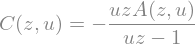

In [26]:
eq_C = u*z*A + u*z*C + c0 - C
func_C = solve(eq_C, C)
Eq(C, func_C[0])

Dall' equazione 

$$A(u) = 1 + uzA(u) + uzB(u) + uzC(u)$$

dovremmo ricavare:

$$A(u) = \frac{(1-uz)(1+uzB(u)}{1-2uz}$$


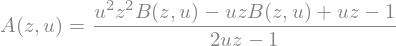

In [27]:
eq_A = (1 + u*z*A + u*z*B + u*z*C - A).subs(C, func_C[0])
func_A = together(solve(eq_A, A))
Eq(A, func_A[0])

Dall'equazione 

$$B(u) = \frac{z}{u}(A(u) - a_0 - ua_1) + \frac{z}{u}(B(u) - b_0)$$

dovremmo ricavare:

$$B(u) = \frac{zu(2u^{2}z^{2}+ 2u^{2}z^{2}b_0+ b_0u-b_0)}{z(z^{2}-2)(u-r_1^{-1})(u-r_2^{-1})}$$

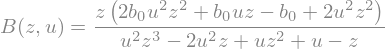

In [28]:
eq_B = ((z/u)*(A - a0 - u*a1) + (z/u)*(B - b0) - B).subs(A, func_A[0])
func_B = solve(eq_B, B)
Eq(B, func_B[0]) 

Ricaviamo dal denominatore di $B(u)$ i valori di $r_1$ e $r_2$:

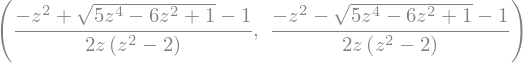

In [29]:
num_B,dem_B = fraction(func_B[0])
Temp_dem_B = solve(dem_B,u)
Temp_dem_B[1], Temp_dem_B[0]

Riscriviamo $B(u)$ con i valori trovati:

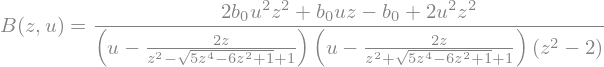

In [30]:
func_B = num_B/(z*((z**2)-2)*(u - (eq_r1**-1))*(u - (eq_r2**-1))) 
eq_B = Eq(B, func_B)
eq_B

Cancelliamo il fattore $$(u - r_{1}^{-1})$$ ottenendo così:

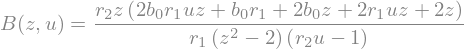

In [31]:
eq_B = (z*(2*r1*u*z + 2*r1*u*z*b0 + b0*r1 +2*z +2*z*b0)*r2)/(r1*((z**2) - 2)*(u*r2 - 1))
Eq(B, eq_B )

Poniamo $$u = 0$$

e ricaviamo $b_0$:

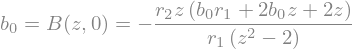

In [32]:
Eq(b0, (Eq(B, eq_B )).subs(u,0))

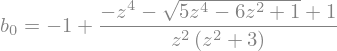

In [33]:
eq_b0= (1 - z**4 - sqrt(1 - 6*z**2 + 5*z**4))/(z**2*(3+z**2)) -1
Eq( b0 ,  eq_b0 )

## Teorema 2

Le tre funzioni generatrici bivariate che descrivono i percorsi decorati (modello duale) che terminano nei tre rispettivi strati sono date da:

$$B = \frac{z(2r_1uz + 2r_1uzb_0 + b_0r_1 + 2z + 2zb_0)r_2}{r1(z^{2} − 2)(ur_2 − 1)}$$

$$ A(u) = \frac{1-uz(1 + uzB(u))}{1-2uz}$$

$$ C(u) = \frac{uz(1 + uzB(u))}{1-2uz}$$

#### Open-Ended Dual Paths

Dato il Teorema 2, dobbiamo trovare la funzione generatrice per la sequenza degli Open-Ended Skew Dyck Paths.

Come specificato nell'articolo, il modello di questi cammini Open-Ended è enumerato dall'espressione $A(z,1) + B(z,1) + C(z,1)$ che utilizza le funzioni $A$, $B$ e $C$ descritte precedentemente nel Teorema 2.

Sostituiamo $$u=1$$ nelle funzioni:

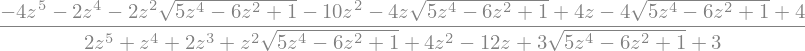

In [34]:
T2_B = cancel(eq_B.subs([(b0, eq_b0), (u,1), (r1, eq_r1), (r2, eq_r2)]))
T2_B

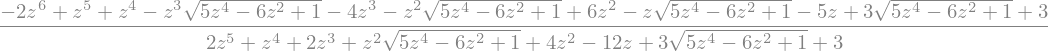

In [35]:
T2_A = cancel(func_A[0].subs([(B, T2_B),(u, 1)]))
T2_A

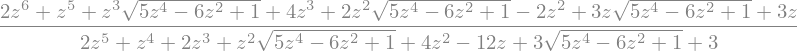

In [36]:
T2_C = cancel(func_C[0].subs([(A, T2_A),(u, 1),]))
T2_C

Ottenendo così la seguente funzione generatrice:

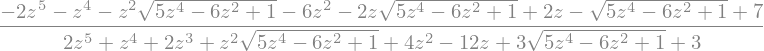

In [37]:
T = Function('T')(u)
T = cancel(T2_B + T2_C + T2_A)
T

Calcolando i coefficienti associati alla funzione generatrice ricavata, otteniamo una sequenza uguale a quella mostrata nell'articolo:

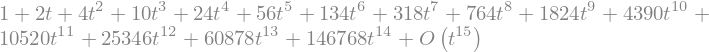

In [38]:
Serie_T = T.subs(z,t)
series(Serie_T,t,0,15) 

## Prove di correttezza ulteriori

In [39]:
import matplotlib.pyplot as plt
from random import seed
from random import randint

seed(1)

a, b, c = symbols("a,b,c")

a = "a"
b = "b"
c = "c"

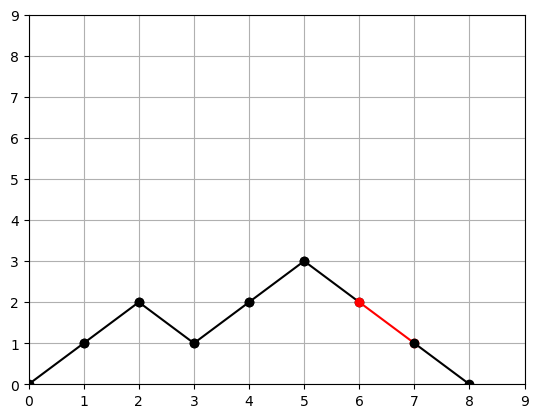

In [40]:
arr = [a,a,b,a,a,b,c,b]
plt.xlim(0, len(arr) + 1)
plt.ylim(0, len(arr) + 1)
plt.grid()

i = 0

x = 0
y = 0
while i < len(arr):
    if(arr[i] == "a"):
        x = x + 1
        y = y + 1
        plt.plot([x - 1,x], [y - 1,y], color="black", marker="o")
    if(arr[i] == "b"):
        x = x + 1
        y = y - 1
        plt.plot([x - 1,x], [y + 1,y], color="black", marker="o")
    if(arr[i] == "c"):
        x = x + 1
        y = y - 1
        plt.plot([x - 1,x], [y + 1,y], color="red", marker="o")
    i = i + 1

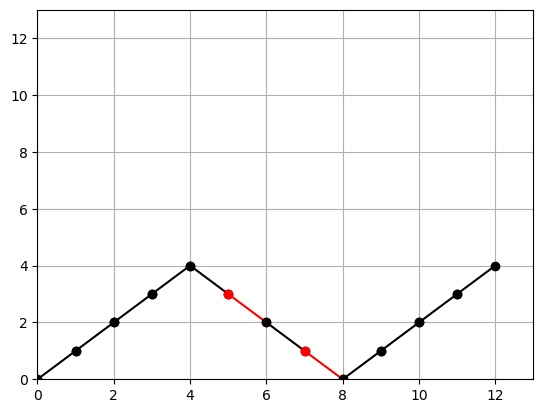

In [41]:
i = 0
arr = [a,a,a,a,b,c,b,c,a,a,a,a,]

plt.xlim(0, len(arr) + 1)
plt.ylim(0, len(arr) + 1)
plt.grid()
x = 0
y = 0

while i < len(arr):
    if(arr[i] == "a"):
        x = x + 1
        y = y + 1
        plt.plot([x - 1,x], [y - 1,y], color="black", marker="o")
    if(arr[i] == "b"):
        x = x + 1
        y = y - 1
        plt.plot([x - 1,x], [y + 1,y], color="black", marker="o")
    if(arr[i] == "c"):
        x = x + 1
        y = y - 1
        plt.plot([x - 1,x], [y + 1,y], color="red", marker="o")
    i = i + 1

In [42]:
curr = 1
prec = 0
prep = 0
level = 1
prec_level = 0
arr = [a]
while curr != 0:
    if(level == 1 and prec_level == 0):
        curr = 1
    elif(level == 0):
        curr = 1
    elif(len(arr) < 5 and prec == 1):
        curr = randint(1,2)
    elif(len(arr) < 5 and prec != 1):
        curr = randint(1,3)
    elif(prec == 1):
        curr = randint(0,2)
    else:
        curr = randint(0,3)
    if(curr == 3 and curr == prec and prec == prep):
        curr = 0
    if(curr == 1):
        arr.append(a)
        prec_level = level
        level = level + 1
    if(curr == 2):
        arr.append(b)
        prec_level = level
        level = level - 1
    if(curr == 3):
        arr.append(c)
        prec_level = level
        level = level - 1
    prep = prec
    prec = curr
    i = i + 1
arr

['a', 'a', 'a', 'a', 'b']

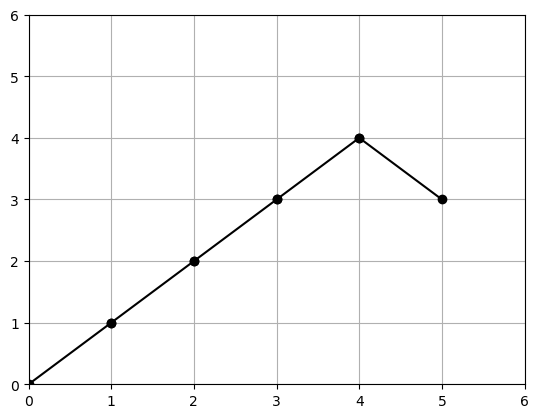

In [43]:
i = 0

plt.xlim(0, len(arr) + 1)
plt.ylim(0, len(arr) + 1)
plt.grid()

x = 0
y = 0

while i < len(arr):
    if(arr[i] == "a"):
        x = x + 1
        y = y + 1
        plt.plot([x - 1,x], [y - 1,y], color="black", marker="o")
    if(arr[i] == "b"):
        x = x + 1
        y = y - 1
        plt.plot([x - 1,x], [y + 1,y], color="black", marker="o")
    if(arr[i] == "c"):
        x = x + 1
        y = y - 1
        plt.plot([x - 1,x], [y + 1,y], color="red", marker="o")
    i = i + 1